In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr, ttest_ind, mannwhitneyu, wilcoxon, levene
import matplotlib
from itertools import combinations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Load configuration
with open("../../config/config_notebooks_HER2.json", "r") as config_file:
    config = json.load(config_file)

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [2]:
# Careful! Install statannotations before this import using:
# pip install statannotations
from statannotations.Annotator import Annotator

# Linear Regression Models Predicting Handcrafted Features

In [3]:
# Set the variables
a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]
base_models = config["base_model_list"]
path_to_regression_results = os.path.join(config["base_benchmark_folder"], "regression", "linear")

# Create the folder if it doesn't exist
os.makedirs(path_to_regression_results, exist_ok=True)

In [4]:
# Load and process regression results
dfs = []
for file in base_models:    
    dfs.append(pd.read_csv(os.path.join(path_to_regression_results, file, 'r2_scores.csv'), index_col=0))

df = pd.concat(dfs, axis=1)
df.columns = base_models

df.drop([idx for idx in df.index if idx.startswith('ExtraCell-Morph')], inplace=True)
df[df < 0] = 0

In [5]:
df

,uni,uni2,virchow,provgigapath,ctranspath,simclr
Nuclei-Morph_Area_mean,0.710304,0.706618,0.710562,0.718217,0.661757,0.635018
Nuclei-Morph_AreaBbox_mean,0.582204,0.576746,0.583045,0.586042,0.530577,0.501618
Nuclei-Morph_CellEccentricities_mean,0.560380,0.560260,0.597738,0.569185,0.524365,0.503253
Nuclei-Morph_Circularity_mean,0.470187,0.456662,0.495038,0.466186,0.423750,0.383642
Nuclei-Morph_Elongation_mean,0.587298,0.574101,0.614815,0.582153,0.553737,0.521677
...,...,...,...,...,...,...
WholePatch-Color_kurtosis_color_G,0.501928,0.497897,0.498802,0.519036,0.533924,0.453863
WholePatch-Color_kurtosis_color_B,0.649022,0.639521,0.658528,0.669422,0.663654,0.572094
WholePatch-Color_entropy_color_R,0.940545,0.929666,0.956988,0.952243,0.953109,0.899628
WholePatch-Color_entropy_color_G,0.930069,0.914491,0.942454,0.945143,0.946807,0.864146


In [6]:
# Print all features
df['feature_type'] = [idx.split('_')[0] for idx in df.index]

for feature_type in df['feature_type'].unique():
    print(f"############## {feature_type} ##############")
    for f in df[df['feature_type'] == feature_type].index:
        print('_'.join(f.split('_')[1:]))

############## Nuclei-Morph ##############
Area_mean
AreaBbox_mean
CellEccentricities_mean
Circularity_mean
Elongation_mean
Extent_mean
MajorAxisLength_mean
MinorAxisLength_mean
Perimeter_mean
Solidity_mean
CurvMean_mean
CurvStd_mean
CurvMax_mean
CurvMin_mean
Area_std
AreaBbox_std
CellEccentricities_std
Circularity_std
Elongation_std
Extent_std
MajorAxisLength_std
MinorAxisLength_std
Perimeter_std
Solidity_std
CurvMean_std
CurvStd_std
CurvMax_std
CurvMin_std
zernike_moment_1_mean
zernike_moment_1_std
zernike_moment_2_mean
zernike_moment_2_std
zernike_moment_3_mean
zernike_moment_3_std
zernike_moment_4_mean
zernike_moment_4_std
zernike_moment_5_mean
zernike_moment_5_std
zernike_moment_6_mean
zernike_moment_6_std
zernike_moment_7_mean
zernike_moment_7_std
zernike_moment_8_mean
zernike_moment_8_std
zernike_moment_9_mean
zernike_moment_9_std
zernike_moment_10_mean
zernike_moment_10_std
zernike_moment_11_mean
zernike_moment_11_std
zernike_moment_12_mean
zernike_moment_12_std
############## 

In [7]:
df.loc[[idx for idx in df.index if idx.startswith('Nuclei-Composition')]]

,uni,uni2,virchow,provgigapath,ctranspath,simclr,feature_type
Nuclei-Composition_number_of_cells,0.921386,0.917346,0.926707,0.925060,0.920784,0.913191,Nuclei-Composition
Nuclei-Composition_total_cell_density,0.921386,0.917346,0.926707,0.925060,0.920784,0.913191,Nuclei-Composition
Nuclei-Composition_prop_of_T_cells,0.716624,0.718789,0.716751,0.724160,0.705641,0.694036,Nuclei-Composition
Nuclei-Composition_density_of_T_cells,0.698032,0.702470,0.701194,0.706930,0.696448,0.694164,Nuclei-Composition
Nuclei-Composition_prop_of_I_cells,0.699643,0.700881,0.702530,0.702697,0.678227,0.646899,Nuclei-Composition
Nuclei-Composition_density_of_I_cells,0.849823,0.850415,0.859819,0.857140,0.842521,0.821573,Nuclei-Composition
Nuclei-Composition_prop_of_S_cells,0.761089,0.758664,0.762945,0.756070,0.739445,0.729142,Nuclei-Composition
Nuclei-Composition_density_of_S_cells,0.641759,0.634637,0.644982,0.635955,0.627580,0.606762,Nuclei-Composition
Nuclei-Composition_prop_of_N_cells,0.249699,0.257567,0.248883,0.267586,0.220941,0.210420,Nuclei-Composition
Nuclei-Composition_density_of_N_cells,0.285387,0.306992,0.290563,0.324047,0.253590,0.243838,Nuclei-Composition


In [8]:
def plot_boxplot_significance(df, x, y, log_scale=False, stripplot=True, palette=None, fontsize=12, showfliers=True,
                              stat='t-test', pairs=None, p_values=None, boxplot=True, ylim=None):
    """
    Plot boxplots with significance annotations.

    Args:
        df (pandas.DataFrame): The dataframe containing the data.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        log_scale (bool, optional): Whether to use a logarithmic scale for the y-axis. Defaults to False.
    """

    if pairs is None or p_values is None:
        pairs = list(combinations(list(df[x].unique()), 2))
        p_values = []
        for p1, p2 in pairs:
            if stat == 't-test':
                p_values.append(
                    ttest_ind(
                        list(df[df[x] == p1][y].values),
                        list(df[df[x] == p2][y].values),
                        equal_var=False,
                        alternative="two-sided",
                        nan_policy='omit')[1])
            elif stat == 'mannwhitneyu':
                p_values.append(
                    mannwhitneyu(
                        list(df[df[x] == p1][y].values),
                        list(df[df[x] == p2][y].values),
                        alternative="two-sided")[1])
            elif stat == 'wilcoxon':
                p_values.append(
                    wilcoxon(
                        list(df[df[x] == p1][y].values),
                        list(df[df[x] == p2][y].values),
                        alternative="two-sided")[1])
            elif stat == 'levene':
                p_values.append(
                    levene(
                        list(df[df[x] == p1][y].values),
                        list(df[df[x] == p2][y].values))[1])
            else:
                raise ValueError(f"Stat test {stat} not supported")
            
    formatted_pvalues = [f"P={pvalue:.2e}" for pvalue in p_values]

    plotting_parameters = {"data": df, "x": x, "y": y, "linewidth": 2.3, 'palette': palette}

    if boxplot:
        ax = sns.boxplot(**plotting_parameters, showfliers=showfliers)
    else:
        ax = sns.violinplot(**plotting_parameters)
    if stripplot:
        sns.stripplot(**plotting_parameters, ax=ax, hue=x)

    if log_scale:
        ax.set_yscale('log')

    if ylim is not None:
        ax.set_ylim(ylim)

    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.configure(fontsize=fontsize)
    annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()
    
    plt.ylabel(y)
    sns.despine()
    plt.xticks(rotation=30)

In [9]:
df_melted = pd.melt(df[base_models], var_name='Model', value_name='R2 score')
df_melted.index = list(df[base_models].index) * len(df[base_models].columns)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

uni vs. uni2: P=8.20e-01
uni2 vs. virchow: P=7.88e-01
virchow vs. provgigapath: P=9.88e-01
provgigapath vs. ctranspath: P=7.10e-01
ctranspath vs. simclr: P=2.17e-01
uni vs. virchow: P=9.68e-01
uni2 vs. provgigapath: P=8.01e-01
virchow vs. ctranspath: P=6.97e-01
provgigapath vs. simclr: P=1.07e-01
uni vs. provgigapath: P=9.80e-01
uni2 vs. ctranspath: P=9.01e-01
virchow vs. simclr: P=1.01e-01
uni vs. ctranspath: P=7.28e-01
uni2 vs. simclr: P=1.69e-01
uni vs. simclr: P=1.11e-01


Text(0.5, 1.0, 'Linear regression R2 scores')

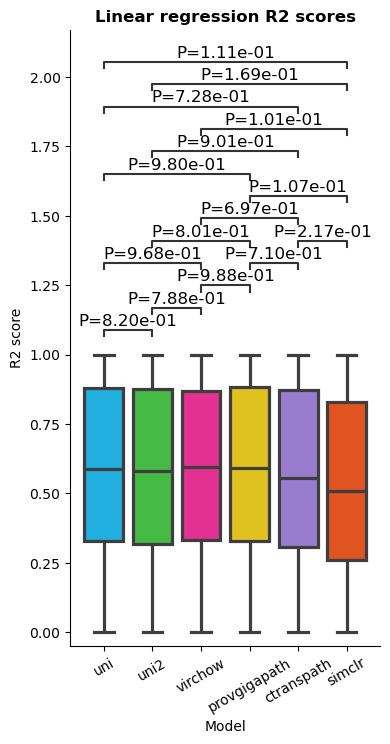

In [10]:
plt.figure(figsize=(4, 8))
plot_boxplot_significance(df_melted, 
                          x='Model', 
                          y='R2 score', 
                          log_scale=False, 
                          stripplot=False, 
                          fontsize=12, 
                          showfliers=False, 
                          stat='t-test', 
                          pairs=None, 
                          p_values=None, 
                          boxplot=True,
                          palette=base_model_palette)

plt.title('Linear regression R2 scores', weight='bold')
#plt.savefig("../Figures/Fig1/hancrafted_features_r2_overall_with_pval.pdf", bbox_inches='tight')

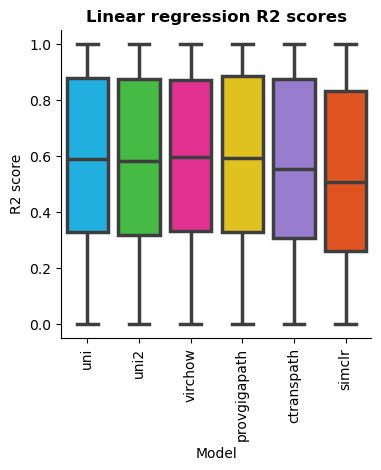

In [11]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_melted, x='Model', y='R2 score', showfliers=False, palette=base_model_palette,
            linewidth=2.5)
sns.despine()
plt.title('Linear regression R2 scores', weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config["figures_folder"], "Figure2/handcrafted_features_r2_overall.pdf"), bbox_inches='tight')

In [12]:
with open(os.path.join(config['base_benchmark_folder'], 'shannon_entropy', "shannon_entropy_512_comps_raw_rescaled.json")) as f:
    shannon_entropy = json.load(f)

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

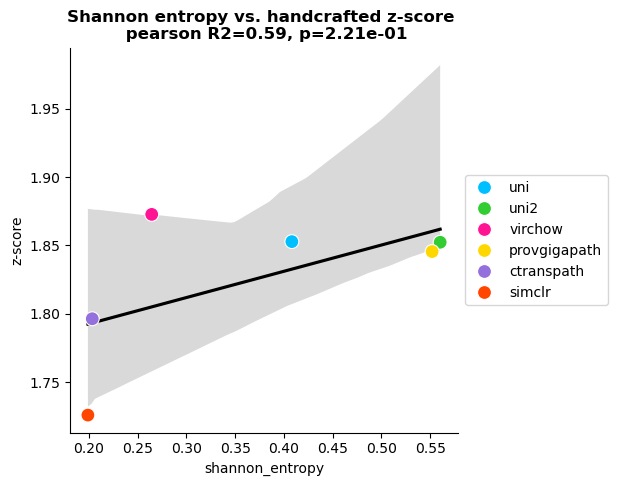

In [13]:
base_model_palette = config["base_model_palette"]
plt.figure(figsize=(5, 5))

df_ = pd.DataFrame(df.mean(numeric_only=True)/df.std(numeric_only=True))
df_.columns = ['z-score']
df_ = df_.merge(df_shannon, left_index=True, right_index=True)

s, p = pearsonr(df_['shannon_entropy'], df_['z-score'])

sns.regplot(x='shannon_entropy', y='z-score', data=df_, color='black')
sns.scatterplot(x='shannon_entropy', y='z-score', data=df_, hue=df_.index, palette=base_model_palette, zorder=2, s=100)
sns.despine()
plt.title(f"Shannon entropy vs. handcrafted z-score \n pearson R2={s:.2f}, p={p:.2e}", weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(os.path.join(config["figures_folder"], "Figure2/handcrafted_zscore_vs_shannon.pdf"), bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

uni vs. uni2: P=9.17e-01
uni2 vs. virchow: P=7.74e-01
virchow vs. provgigapath: P=8.88e-01
provgigapath vs. ctranspath: P=5.43e-01
ctranspath vs. simclr: P=6.13e-01
uni vs. virchow: P=8.54e-01
uni2 vs. provgigapath: P=8.84e-01
virchow vs. ctranspath: P=4.51e-01
provgigapath vs. simclr: P=2.70e-01
uni vs. provgigapath: P=9.67e-01
uni2 vs. ctranspath: P=6.44e-01
virchow vs. simclr: P=2.11e-01
uni vs. ctranspath: P=5.70e-01
uni2 vs. simclr: P=3.37e-01
uni vs. simclr: P=2.86e-01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

uni vs. uni2: P=8.94e-01
uni2 vs. virchow: P=9.14e-01
virchow vs. provgigapath: P=9.29e-01
provgigapath vs. ctranspath: P=8.77e-01
ctran

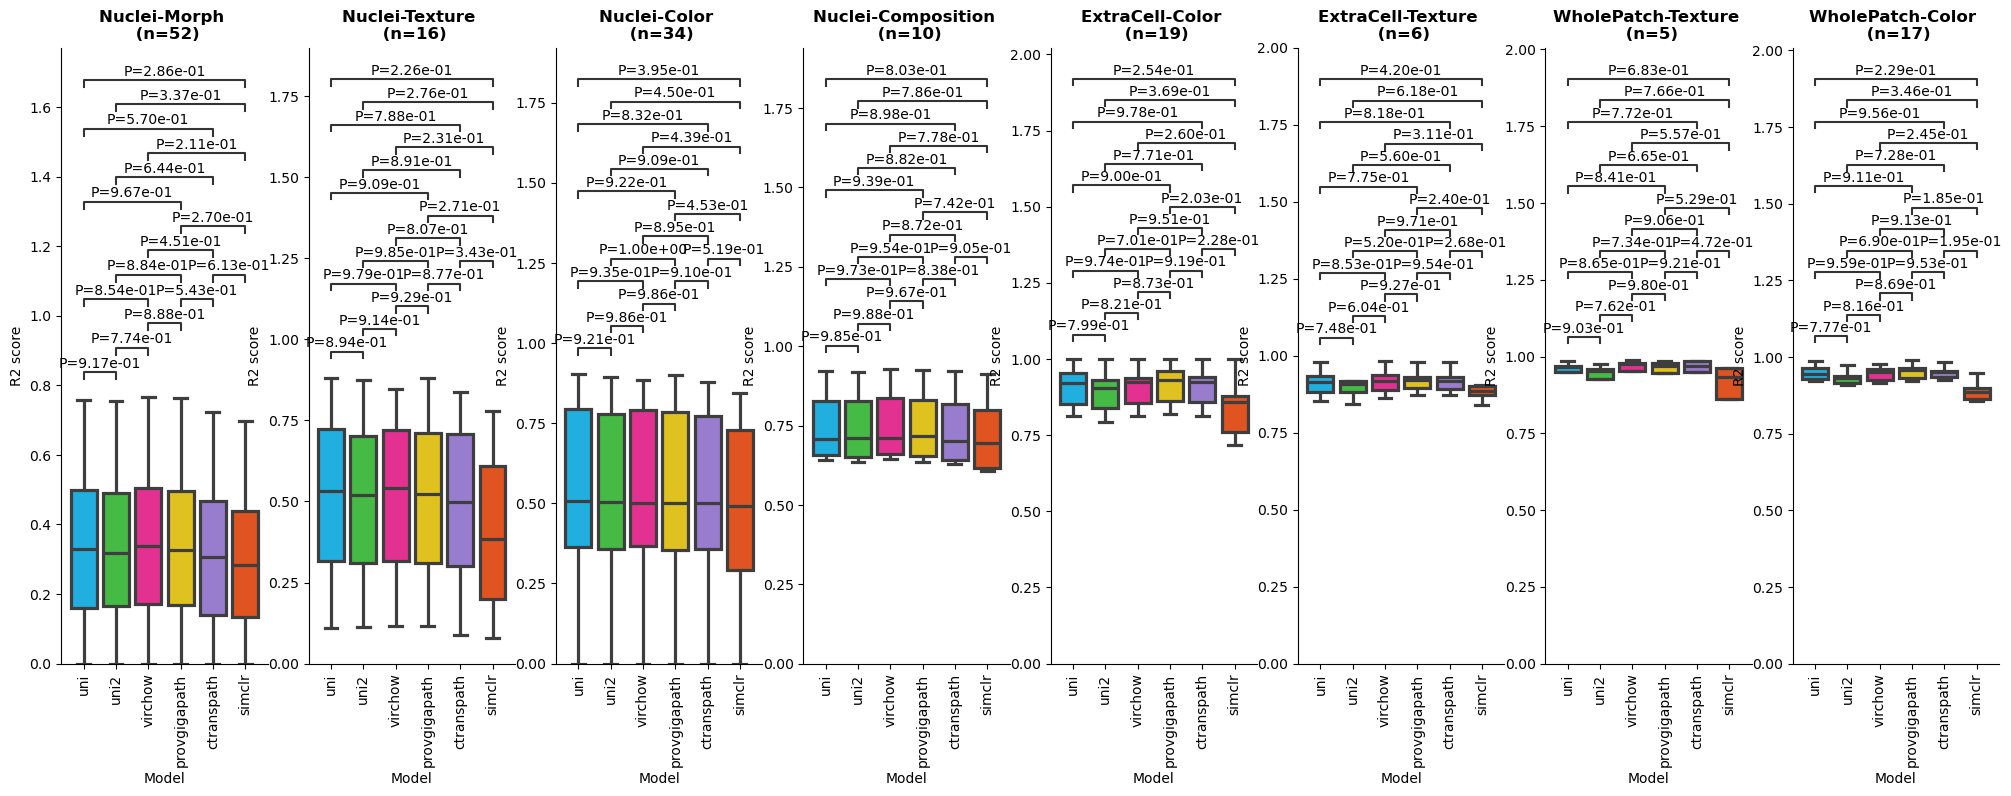

In [14]:
df_melted['feature_type'] = [idx.split("_")[0] for idx in df_melted.index]
plt.figure(figsize=(25, 8))
for feature in df_melted['feature_type'].unique():
    plt.subplot(1, 8, list(df_melted['feature_type'].unique()).index(feature) + 1)
    plot_boxplot_significance(df_melted[df_melted['feature_type'] == feature], 
                              x='Model', 
                              y='R2 score', 
                              log_scale=False, 
                              stripplot=False, 
                              fontsize=10, 
                              showfliers=False, 
                              stat='t-test', 
                              pairs=None, 
                              p_values=None, 
                              boxplot=True,
                              ylim=(0,1),
                              palette=base_model_palette)
    plt.title(f"{feature} \n (n={int(len(df_melted[df_melted['feature_type'] == feature])/len(base_models))})", weight='bold')
    plt.xticks(rotation=90)


In [15]:
df_melted['feature_name'] = df_melted.index
df_melted[~df_melted['feature_name'].str.contains('zernike')]

,Model,R2 score,feature_type,feature_name
Nuclei-Morph_Area_mean,uni,0.710304,Nuclei-Morph,Nuclei-Morph_Area_mean
Nuclei-Morph_AreaBbox_mean,uni,0.582204,Nuclei-Morph,Nuclei-Morph_AreaBbox_mean
Nuclei-Morph_CellEccentricities_mean,uni,0.560380,Nuclei-Morph,Nuclei-Morph_CellEccentricities_mean
Nuclei-Morph_Circularity_mean,uni,0.470187,Nuclei-Morph,Nuclei-Morph_Circularity_mean
Nuclei-Morph_Elongation_mean,uni,0.587298,Nuclei-Morph,Nuclei-Morph_Elongation_mean
...,...,...,...,...
WholePatch-Color_kurtosis_color_G,simclr,0.453863,WholePatch-Color,WholePatch-Color_kurtosis_color_G
WholePatch-Color_kurtosis_color_B,simclr,0.572094,WholePatch-Color,WholePatch-Color_kurtosis_color_B
WholePatch-Color_entropy_color_R,simclr,0.899628,WholePatch-Color,WholePatch-Color_entropy_color_R
WholePatch-Color_entropy_color_G,simclr,0.864146,WholePatch-Color,WholePatch-Color_entropy_color_G


In [16]:
df['feature_name'] = df.index   
df[df['feature_name'].str.contains('ExtraCell-Color')]

,uni,uni2,virchow,provgigapath,ctranspath,simclr,feature_type,feature_name
ExtraCell-Color_mean_color_R,0.971212,0.956034,0.953021,0.974890,0.962762,0.908865,ExtraCell-Color,ExtraCell-Color_mean_color_R
ExtraCell-Color_mean_color_G,0.971284,0.956705,0.943974,0.974726,0.962657,0.881920,ExtraCell-Color,ExtraCell-Color_mean_color_G
ExtraCell-Color_mean_color_B,0.942745,0.915875,0.900857,0.951258,0.901794,0.806744,ExtraCell-Color,ExtraCell-Color_mean_color_B
ExtraCell-Color_mean_intensity,0.965468,0.948379,0.937949,0.970107,0.950986,0.880146,ExtraCell-Color,ExtraCell-Color_mean_intensity
ExtraCell-Color_std_color_R,0.930211,0.909732,0.933150,0.930570,0.924451,0.860614,ExtraCell-Color,ExtraCell-Color_std_color_R
ExtraCell-Color_std_color_G,0.930929,0.901852,0.925290,0.929961,0.922574,0.845275,ExtraCell-Color,ExtraCell-Color_std_color_G
ExtraCell-Color_std_color_B,0.922034,0.899524,0.921617,0.923402,0.914503,0.862483,ExtraCell-Color,ExtraCell-Color_std_color_B
ExtraCell-Color_std_intensity,0.929323,0.905919,0.929030,0.929469,0.923070,0.857306,ExtraCell-Color,ExtraCell-Color_std_intensity
ExtraCell-Color_skew_color_R,0.850434,0.838313,0.857453,0.861658,0.853766,0.767774,ExtraCell-Color,ExtraCell-Color_skew_color_R
ExtraCell-Color_skew_color_G,0.856122,0.837864,0.853043,0.864518,0.862023,0.755881,ExtraCell-Color,ExtraCell-Color_skew_color_G


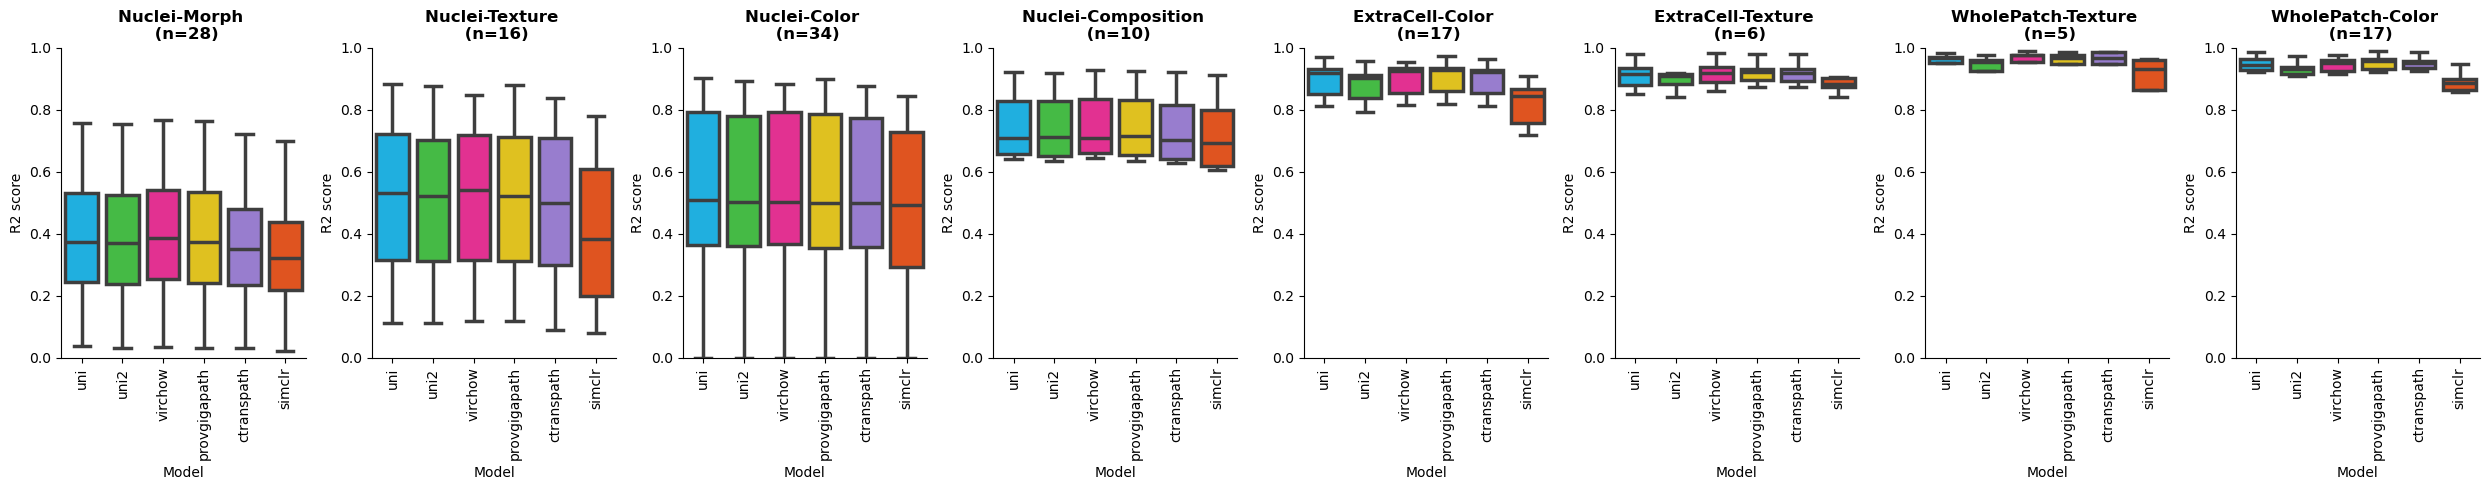

In [17]:
plt.figure(figsize=(25, 5))
for feature in df_melted['feature_type'].unique():
    df_melted = df_melted[~df_melted['feature_name'].str.contains('zernike')]
    df_melted = df_melted[~df_melted['feature_name'].str.contains('transparency')]
    plt.subplot(1, 8, list(df_melted['feature_type'].unique()).index(feature) + 1)
    sns.boxplot(df_melted[df_melted['feature_type'] == feature], 
                              x='Model', 
                              y='R2 score', 
                              showfliers=False, 
                              palette=base_model_palette,
                              linewidth=2.5)
    
    sns.despine()
    plt.title(f"{feature} \n (n={int(len(df_melted[df_melted['feature_type'] == feature])/len(base_models))})", weight='bold')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    
plt.tight_layout()
plt.savefig(os.path.join(config["figures_folder"], "Figure3/handcrafted_features_r2_per_feature.pdf"), bbox_inches='tight')

                                       Model  R2 score  feature_type  \
Nuclei-Morph_Area_mean                   uni  0.710304  Nuclei-Morph   
Nuclei-Morph_AreaBbox_mean               uni  0.582204  Nuclei-Morph   
Nuclei-Morph_CellEccentricities_mean     uni  0.560380  Nuclei-Morph   
Nuclei-Morph_Circularity_mean            uni  0.470187  Nuclei-Morph   
Nuclei-Morph_Elongation_mean             uni  0.587298  Nuclei-Morph   
...                                      ...       ...           ...   
Nuclei-Morph_Solidity_std             simclr  0.253590  Nuclei-Morph   
Nuclei-Morph_CurvMean_std             simclr  0.173918  Nuclei-Morph   
Nuclei-Morph_CurvStd_std              simclr  0.232002  Nuclei-Morph   
Nuclei-Morph_CurvMax_std              simclr  0.022782  Nuclei-Morph   
Nuclei-Morph_CurvMin_std              simclr  0.291528  Nuclei-Morph   

                                                              feature_name  
Nuclei-Morph_Area_mean                              Nuclei

<Figure size 400x800 with 0 Axes>

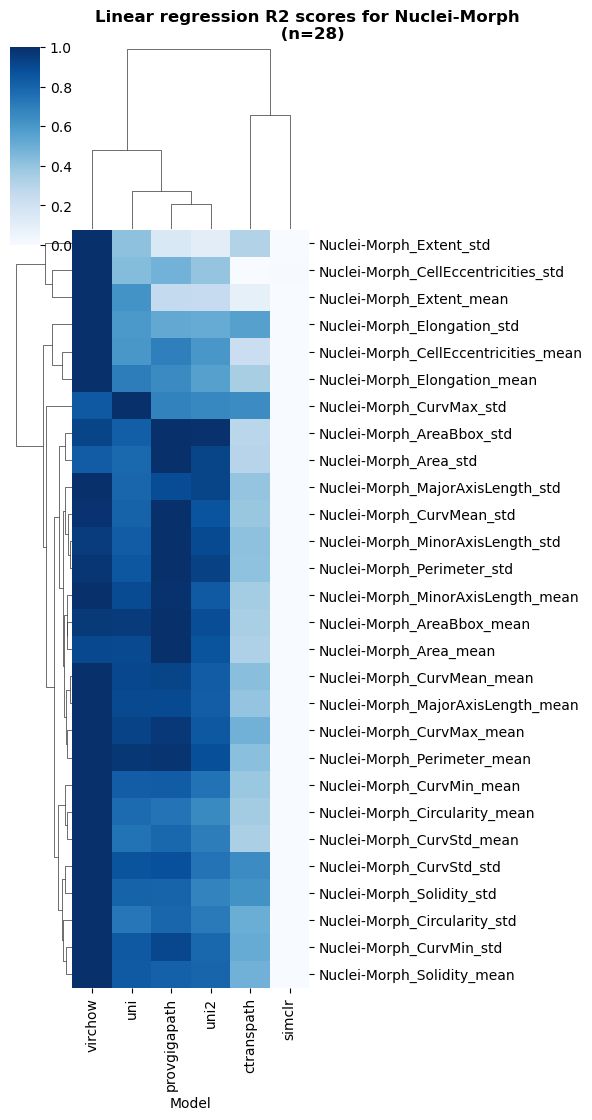

<Figure size 400x800 with 0 Axes>

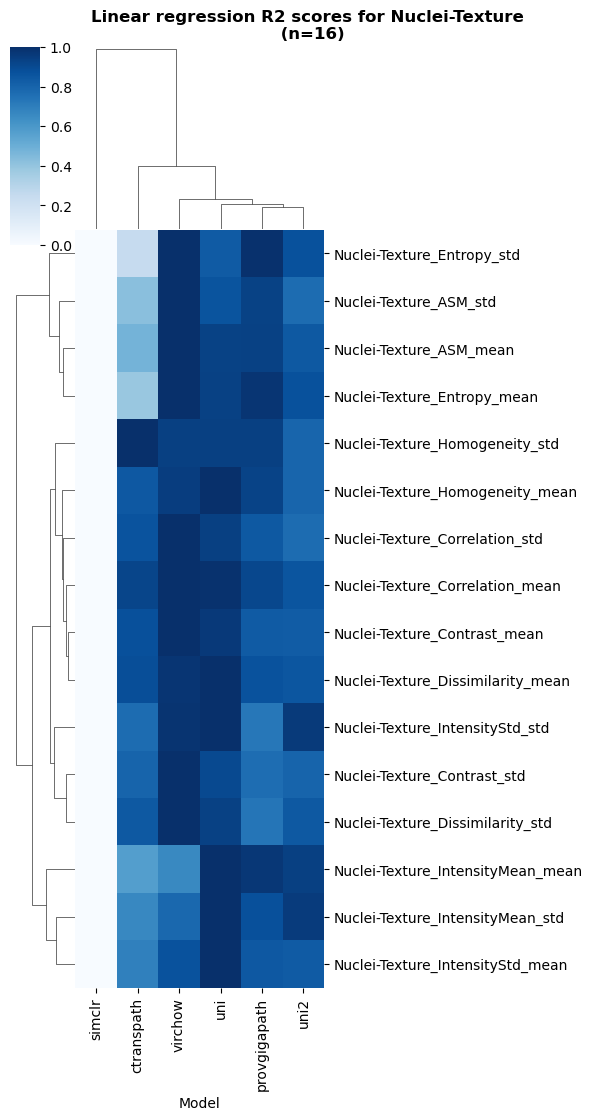

<Figure size 400x800 with 0 Axes>

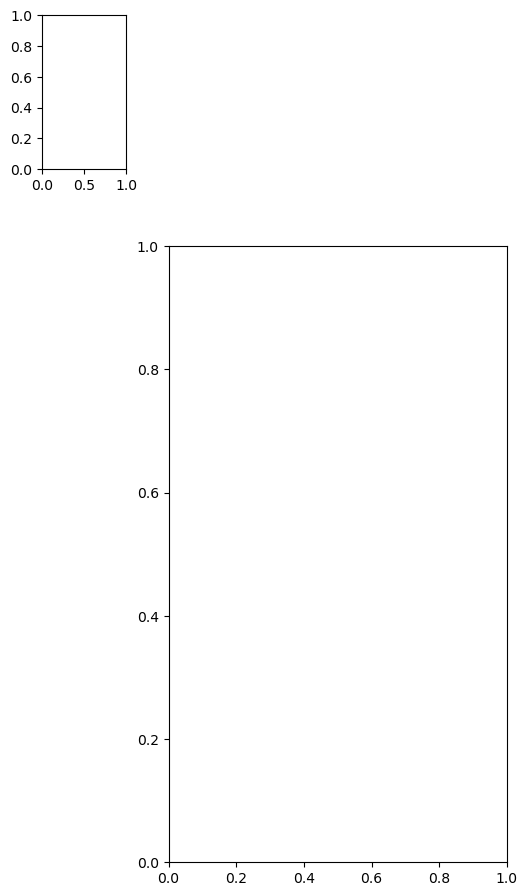

<Figure size 400x800 with 0 Axes>

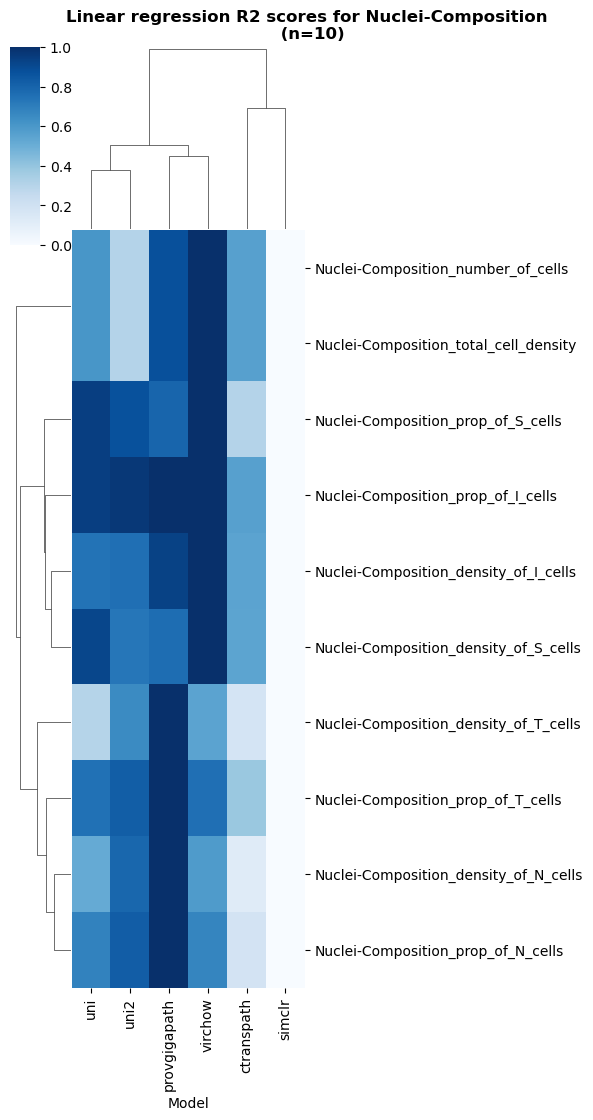

<Figure size 400x800 with 0 Axes>

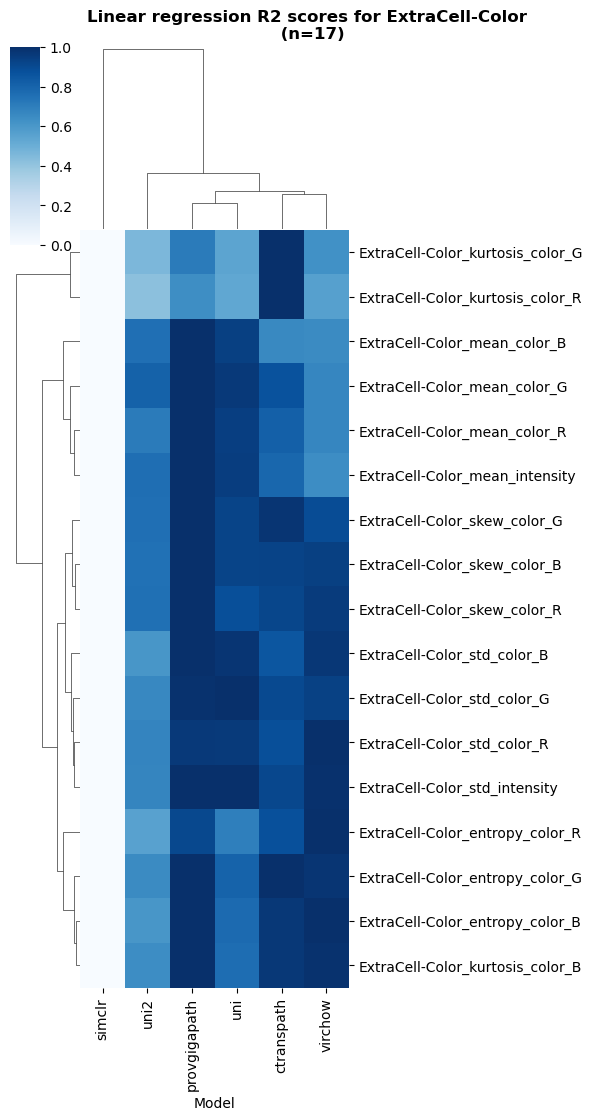

<Figure size 400x800 with 0 Axes>

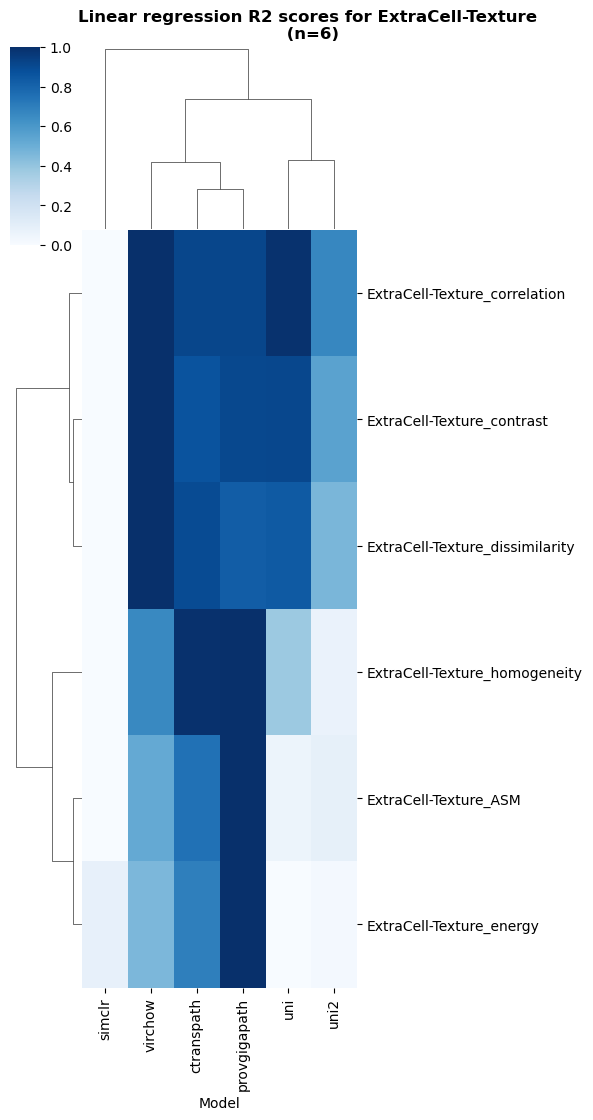

<Figure size 400x800 with 0 Axes>

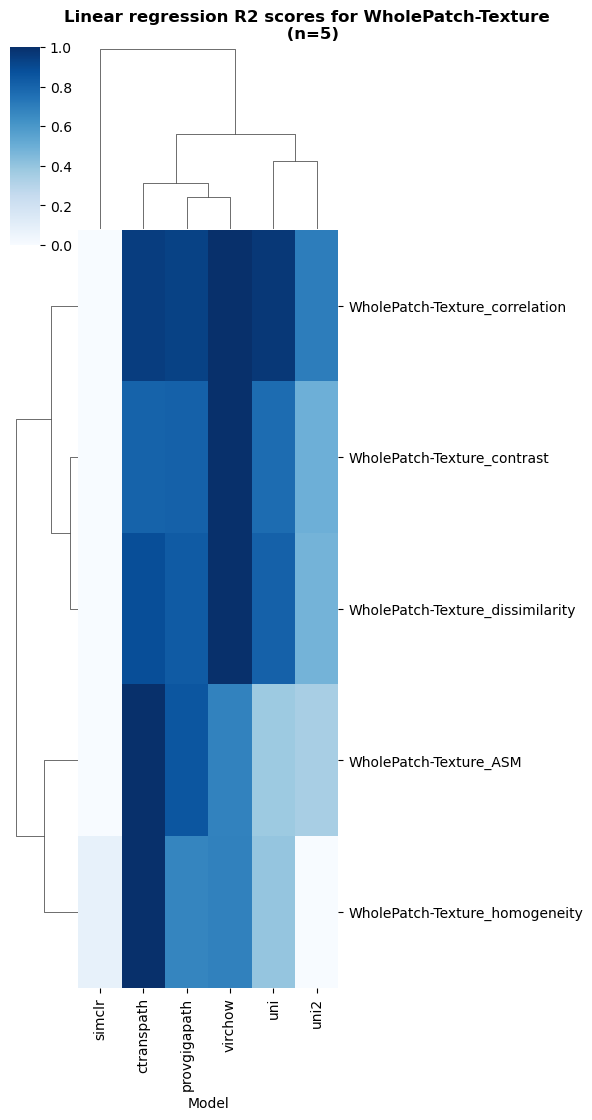

<Figure size 400x800 with 0 Axes>

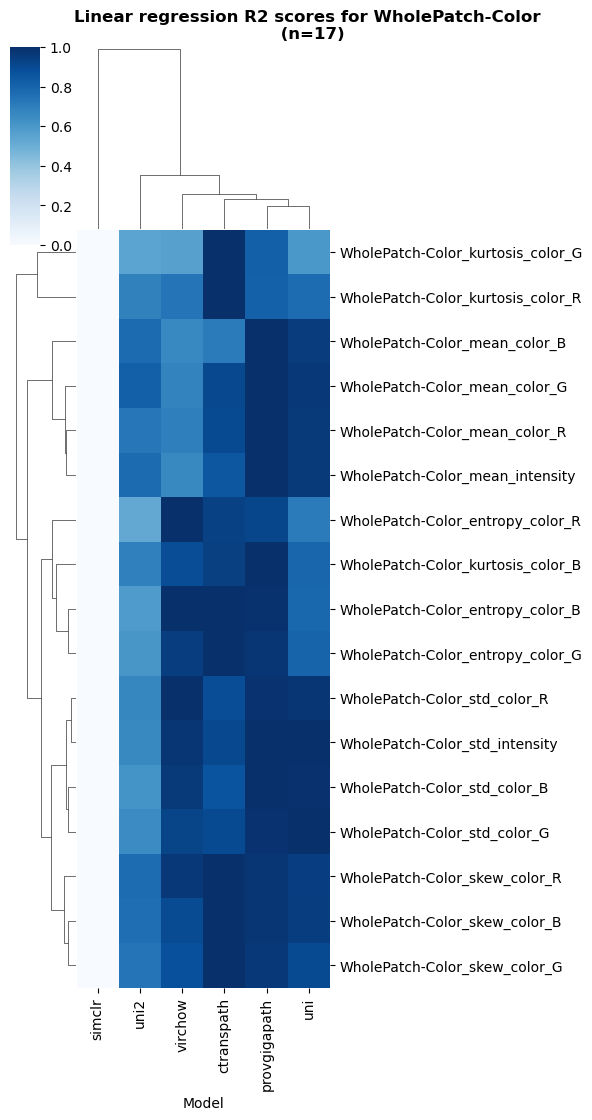

In [18]:
from sklearn.preprocessing import StandardScaler

for feature in df_melted['feature_type'].unique():
    plt.figure(figsize=(4, 8))
    sub_df = df_melted[df_melted['feature_type'] == feature]
    print(sub_df)
    
    # Remove infinite values in the dataframe
    sub_df = sub_df.replace([np.inf, -np.inf], np.nan)
    
    # Drop rows with NaN values
    sub_df = sub_df.dropna()
    
    # Pivot the DataFrame
    pivot_df = sub_df.pivot(columns='Model', values='R2 score')
    
    # Check for non-finite values in the pivoted DataFrame
    if np.any(~np.isfinite(pivot_df.values)):
        print("Pivoted DataFrame contains non-finite values. Replacing them with the maximum finite value.")
        pivot_df = pivot_df.applymap(lambda x: np.nanmax(pivot_df.values[np.isfinite(pivot_df.values)]) if not np.isfinite(x) else x)
    try:
        sns.clustermap(pivot_df, 
                    cmap='Blues', 
                    figsize=(6, 11), 
                    method='average', 
                    metric='euclidean', 
                    standard_scale=0, 
                    row_cluster=True, 
                    col_cluster=True,
                    yticklabels=True)
        plt.title(f"Linear regression R2 scores for {feature} \n (n={int(len(df_melted[df_melted['feature_type'] == feature])/len(base_models))})", weight='bold', x=10)
    except:
        print("Error plotting clustermap")
        continue
    
    plt.savefig(os.path.join(config["figures_folder"], f"Figure2/handcrafted_features_heatmap_r2_{feature}.pdf"), bbox_inches='tight')

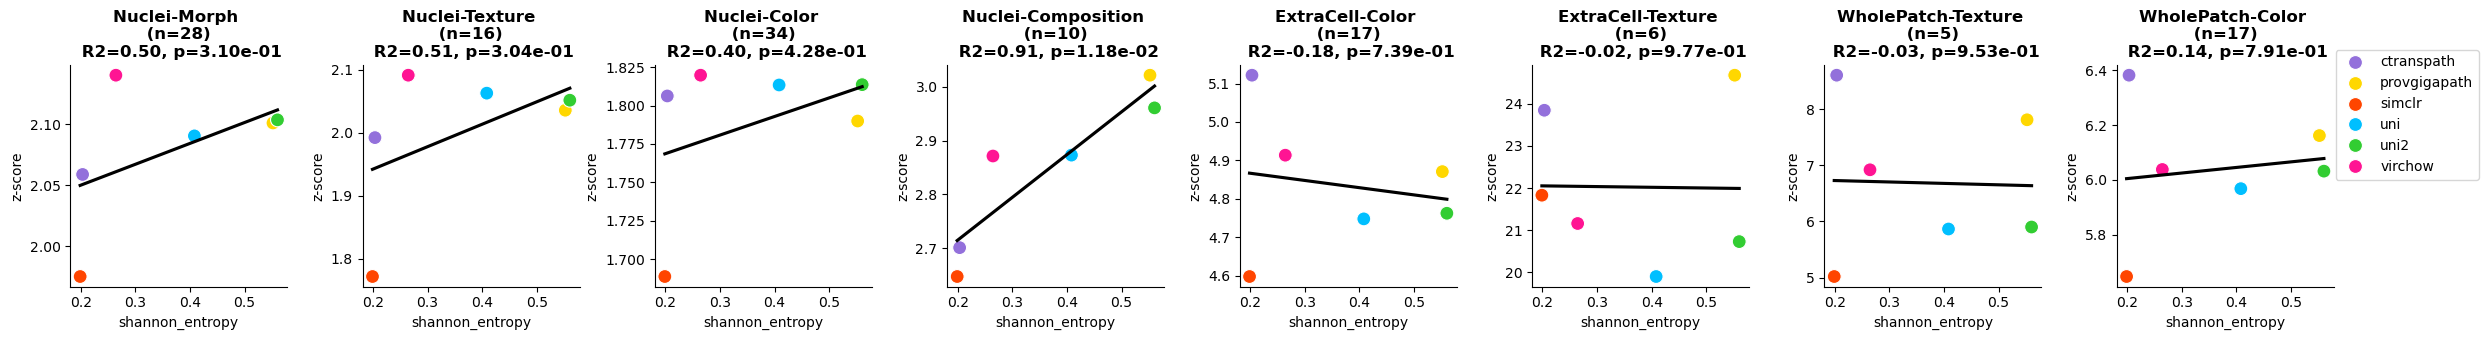

In [19]:
base_model_palette = config["base_model_palette"]
plt.figure(figsize=(25, 3.5))

for feature in df_melted['feature_type'].unique():
    plt.subplot(1, 8, list(df_melted['feature_type'].unique()).index(feature) + 1)
    sub_df = df_melted[df_melted['feature_type'] == feature].pivot(columns='Model', values='R2 score')
    df_ = pd.DataFrame(sub_df.mean()/sub_df.std())
    df_.columns = ['z-score']
    df_ = df_.merge(df_shannon, left_index=True, right_index=True)

    s, p = pearsonr(df_['shannon_entropy'], df_['z-score'])

    sns.regplot(x='shannon_entropy', y='z-score', data=df_, color='black', ci=None)
    sns.scatterplot(x='shannon_entropy', y='z-score', data=df_, hue=df_.index, palette=base_model_palette, s=100)
    sns.despine()
    plt.title(f"{feature} \n (n={int(len(df_melted[df_melted['feature_type'] == feature])/len(base_models))}) \n R2={s:.2f}, p={p:.2e}", weight='bold')
    if list(df_melted['feature_type'].unique()).index(feature) + 1 != 8:
        plt.legend().remove()
    else:
        plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.1))
        
plt.tight_layout()
plt.savefig(os.path.join(config["figures_folder"], "Figure2/handcrafted_zscore_vs_shannon_per_feature.pdf"), bbox_inches='tight')

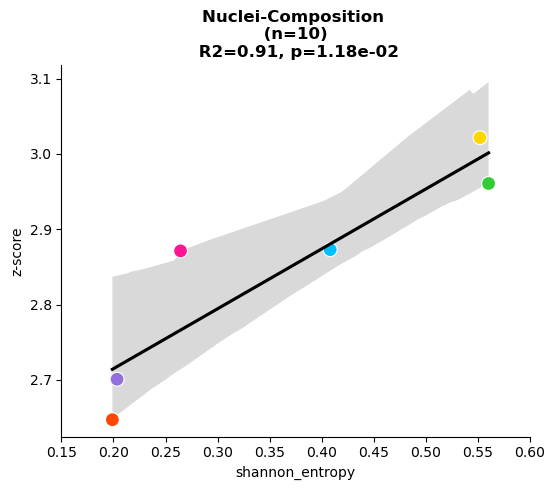

In [20]:
base_model_palette = config["base_model_palette"]

plt.figure(figsize=(5.5,5))
feature="Nuclei-Composition"
sub_df = df_melted[df_melted['feature_type'] == feature].pivot(columns='Model', values='R2 score')
df_ = pd.DataFrame(sub_df.mean()/sub_df.std())
df_.columns = ['z-score']
df_ = df_.merge(df_shannon, left_index=True, right_index=True)

s, p = pearsonr(df_['shannon_entropy'], df_['z-score'])

sns.regplot(x='shannon_entropy', y='z-score', data=df_, color='black')
sns.scatterplot(x='shannon_entropy', y='z-score', data=df_, hue=df_.index, palette=base_model_palette, s=100)
sns.despine()
plt.title(f"{feature} \n (n={int(len(df_melted[df_melted['feature_type'] == feature])/len(base_models))}) \n R2={s:.2f}, p={p:.2e}", weight='bold')
if list(df_melted['feature_type'].unique()).index(feature) + 1 != 8:
    plt.legend().remove()
else:
    plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.1))
        
plt.tight_layout()
plt.xlim(0.15,0.6)

plt.savefig(os.path.join(config["figures_folder"], "Figure2/handcrafted_zscore_vs_shannon_per_feature.pdf"), bbox_inches='tight')

## Retrained models

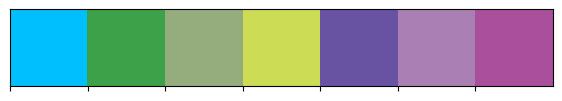

In [21]:
retrained_palette = sns.color_palette(config['retrained_color_palette'])
sns.palplot(retrained_palette)

# Create Figure 3 
os.makedirs(os.path.join(config["figures_folder"], "Figure3"), exist_ok=True)

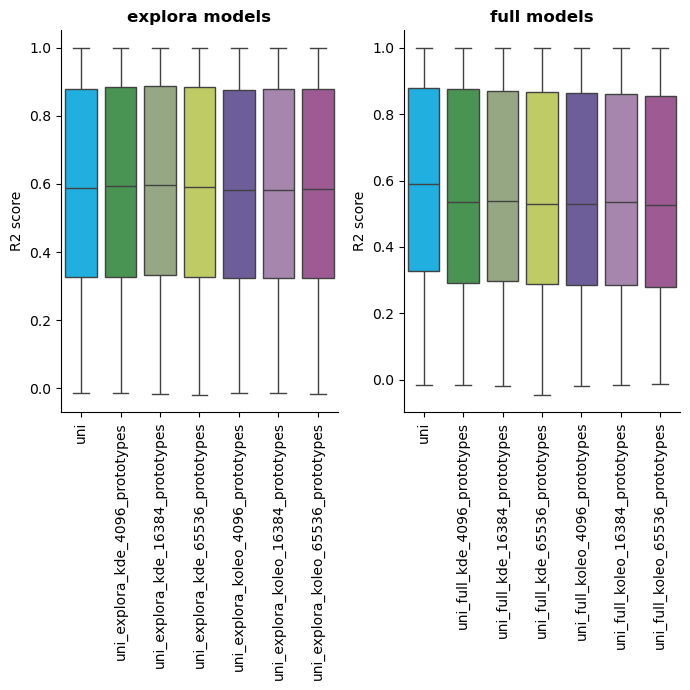

In [22]:

plt.figure(figsize=(7, 7))

i = 0
for model_type, names, benchmark_folder in zip([config['retrained_model_list1_type'],
                                    config['retrained_model_list2_type']], 
                                    [config['retrained_model_list1'],
                                      config['retrained_model_list2']],
                                      [config['retrained_benchmark_folder1'],
                                       config['retrained_benchmark_folder2']]):
    plt.subplot(1, 2, i+1)

    dfs = []
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression/linear", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    sns.boxplot(data=df, palette=retrained_palette, showfliers=False)
    sns.despine()
    plt.xticks(rotation=90);
    plt.title(f"{model_type} models", weight='bold')
    plt.ylabel("R2 score")
    i += 1
plt.savefig(os.path.join(config['figures_folder'], "Figure3/handcrafted_features_r2_boxplots.pdf"), bbox_inches='tight')

plt.tight_layout()

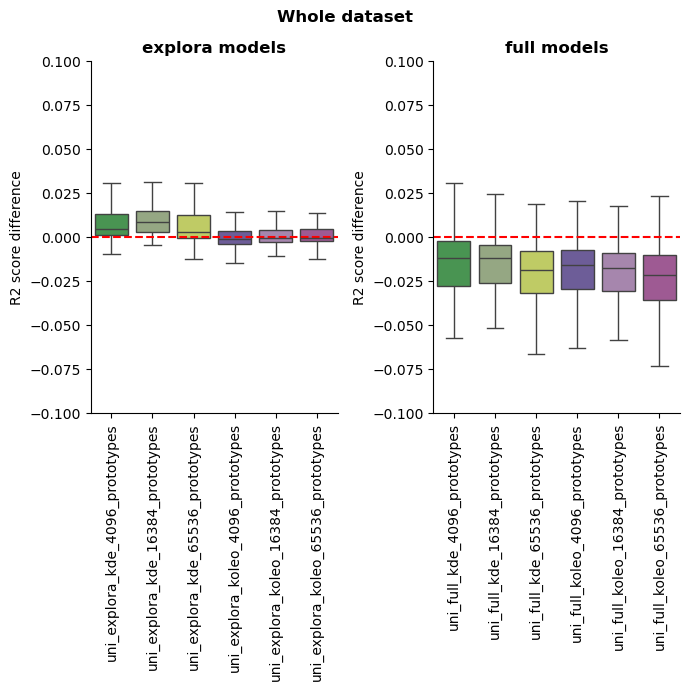

In [23]:
plt.figure(figsize=(7, 7))
i = 0
for model_type, names, benchmark_folder in zip([config['retrained_model_list1_type'],
                                    config['retrained_model_list2_type']], 
                                    [config['retrained_model_list1'],
                                      config['retrained_model_list2']],
                                      [config['retrained_benchmark_folder1'],
                                       config['retrained_benchmark_folder2']]):
    plt.subplot(1, 2, i+1)

    dfs = []
    
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)

    sns.boxplot(data=df_diff, palette=retrained_palette[1:], showfliers=False)
    sns.despine()
    plt.xticks(rotation=90);
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{model_type} models", weight='bold')
    plt.ylim(-0.1, 0.1)
    plt.ylabel("R2 score difference")
    i += 1

plt.suptitle("Whole dataset", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure3/handcrafted_features_r2_diff_boxplots.pdf"), bbox_inches='tight')

plt.tight_layout()

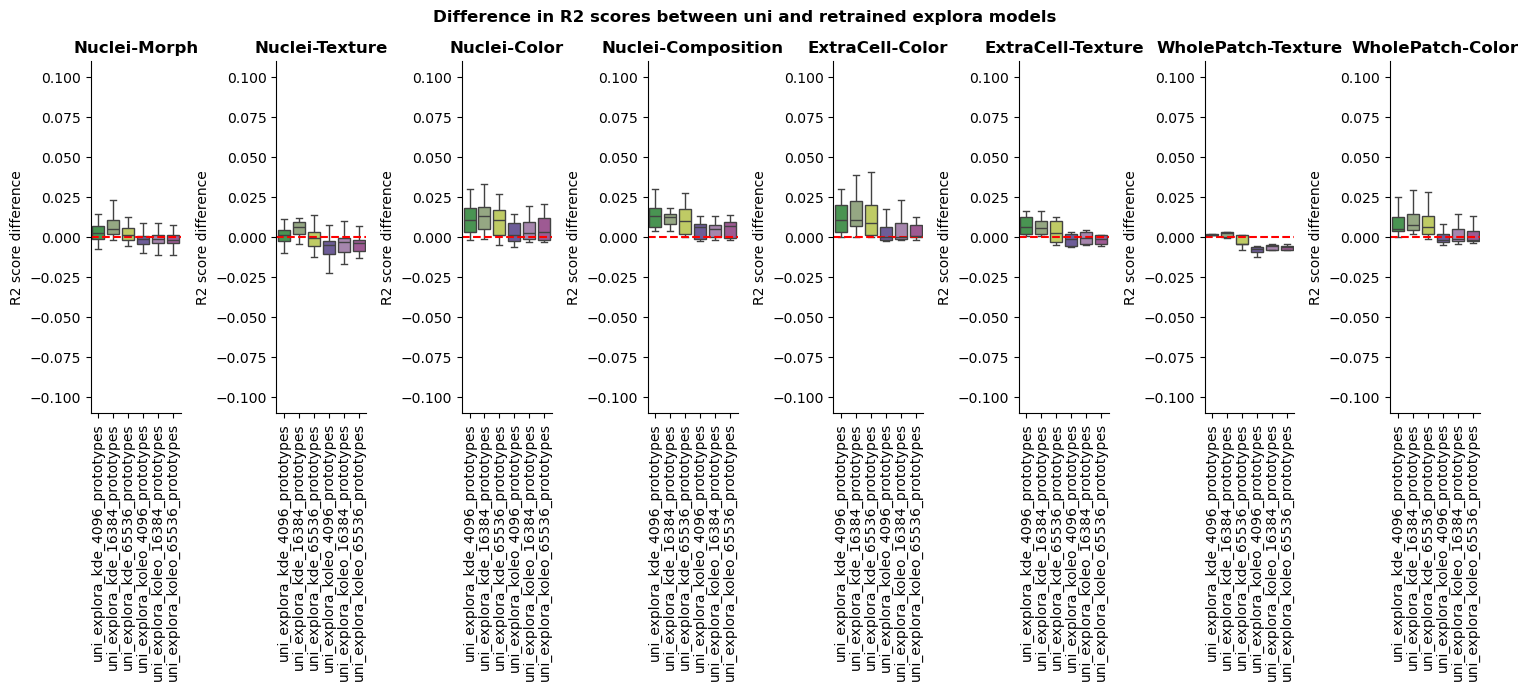

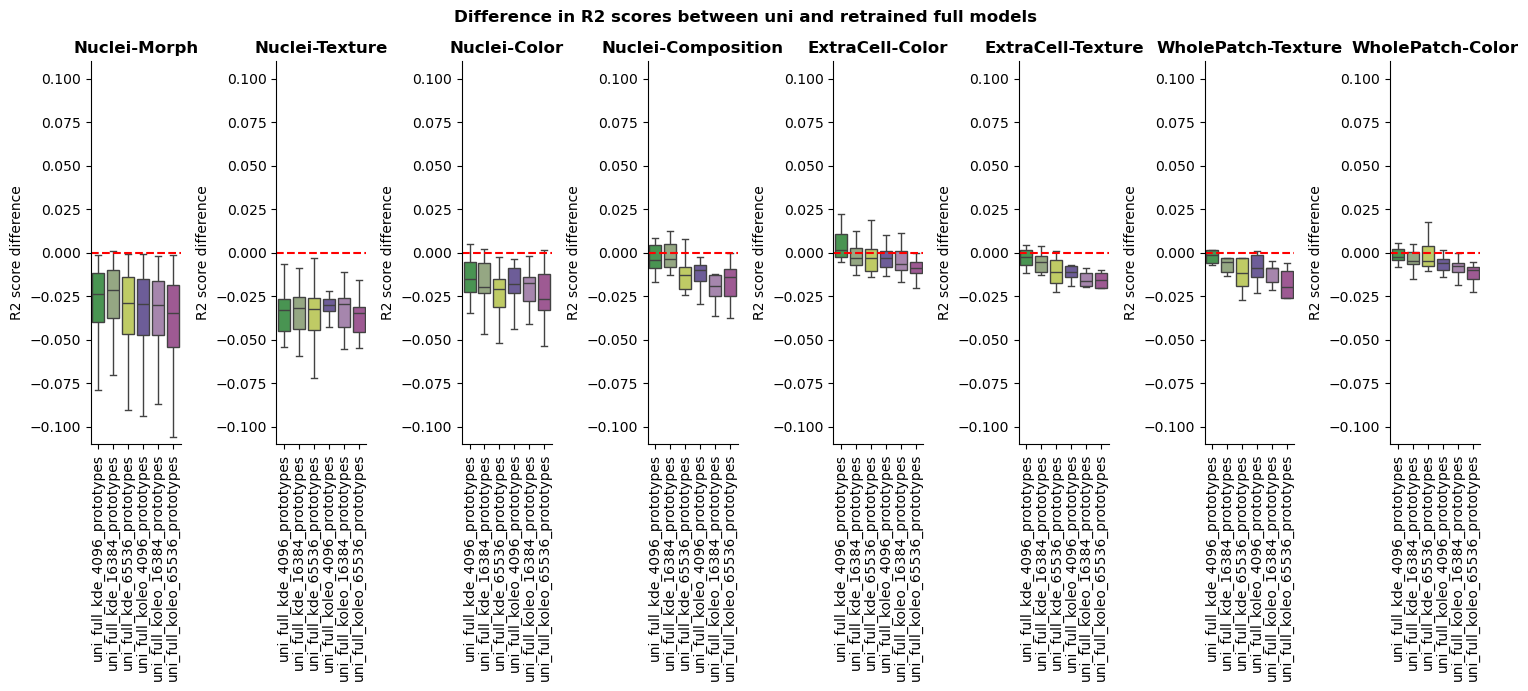

In [24]:
for model_type, names, benchmark_folder in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):
    
    dfs = []
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)

    feature_types = list(set([idx.split("_")[0] for idx in df_diff.index]))
    feature_types_order = df_melted['feature_type'].unique()
    
    plt.figure(figsize=(15, 7))

    for j, feature_type in enumerate(feature_types_order):
        plt.subplot(1, len(feature_types), j+1)
        idxs = [idx for idx in df_diff.index if idx.startswith(feature_type)]
        sns.boxplot(data=df_diff.loc[idxs], palette=retrained_palette[1:], showfliers=False)
        plt.xticks(rotation=90)
        plt.title(f"{feature_type}", weight='bold')
        plt.ylabel("R2 score difference")
        sns.despine()
        if model_type == "full":
            plt.ylim(-0.11, 0.12)
        else:
            plt.ylim(-0.05, 0.05)
        plt.ylim(-0.11, 0.11)
        plt.axhline(0, color='red', linestyle='--')

    plt.suptitle(f"Difference in R2 scores between uni and retrained {model_type} models", weight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/handcrafted_features_r2_diff_{model_type}_vs_uni_per_feature.pdf"), bbox_inches='tight')

In [25]:
ordered_list = [
    "Nuclei-Morph", "Nuclei-Texture",  "Nuclei-Color", "Nuclei-Composition", 
    "ExtraCell-Color", "ExtraCell-Texture", "WholePatch-Texture", "WholePatch-Color"]

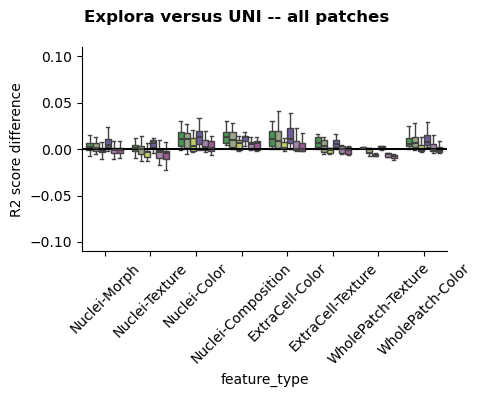

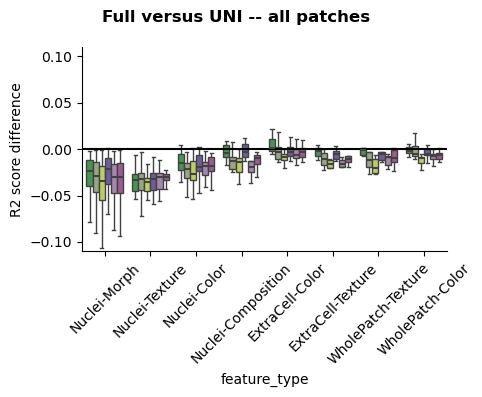

In [26]:
for model_type, names, benchmark_folder in zip(
  [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
  [config['retrained_model_list1'], config['retrained_model_list2']],
  [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

    dfs = []
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)

    plt.figure(figsize=(5, 4))

    df_diff_melted = df_diff.reset_index().melt(id_vars='index', var_name='Model', value_name='R2 score difference')
    df_diff_melted.rename(columns={'index': 'feature'}, inplace=True)
    df_diff_melted["feature_type"] = [idx.split("_")[0] for idx in df_diff_melted['feature']]

    df_diff_melted['feature_type'] = pd.Categorical(df_diff_melted['feature_type'], categories=ordered_list, ordered=True)
    df_diff_melted = df_diff_melted.sort_values('feature_type').reset_index(drop=True)

    sns.boxplot(df_diff_melted, x='feature_type', y='R2 score difference', hue="Model", 
                showfliers=False, palette=retrained_palette[1:],  linewidth=1,  medianprops=dict(linewidth=1.5))
    sns.despine()
    plt.ylim(-0.11, 0.11)

    plt.legend().remove()
    plt.xticks(rotation=45);
    plt.axhline(y=0, color="black")

    plt.suptitle(f"{model_type.capitalize()} versus UNI -- all patches", weight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/handcrafted_features_r2_diff_{model_type}_vs_uni_per_feature.pdf"), bbox_inches='tight')

## Retrained models -- on invasive cancer only

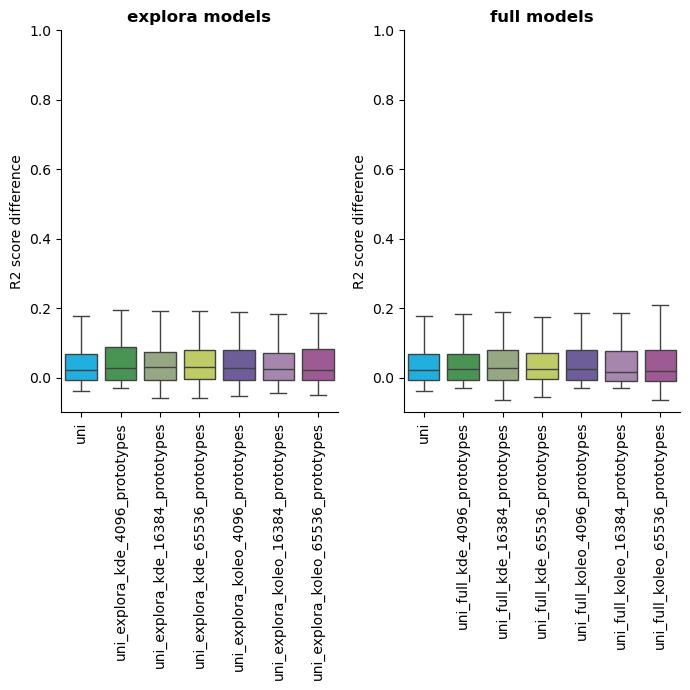

In [27]:
plt.figure(figsize=(7, 7))
i = 0
for model_type, names, benchmark_folder in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):
    
    plt.subplot(1, 2, i+1)

    dfs = []
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", "invasive", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    sns.boxplot(data=df, palette=retrained_palette, showfliers=False)
    sns.despine()
    plt.xticks(rotation=90);
    plt.title(f"{model_type} models", weight='bold')
    plt.ylabel("R2 score difference")
    plt.ylim(-0.1, 1)
    i += 1

plt.tight_layout()
plt.savefig(os.path.join(config["figures_folder"], "Figure3/handcrafted_features_r2_boxplots_invasive.pdf"), bbox_inches='tight')

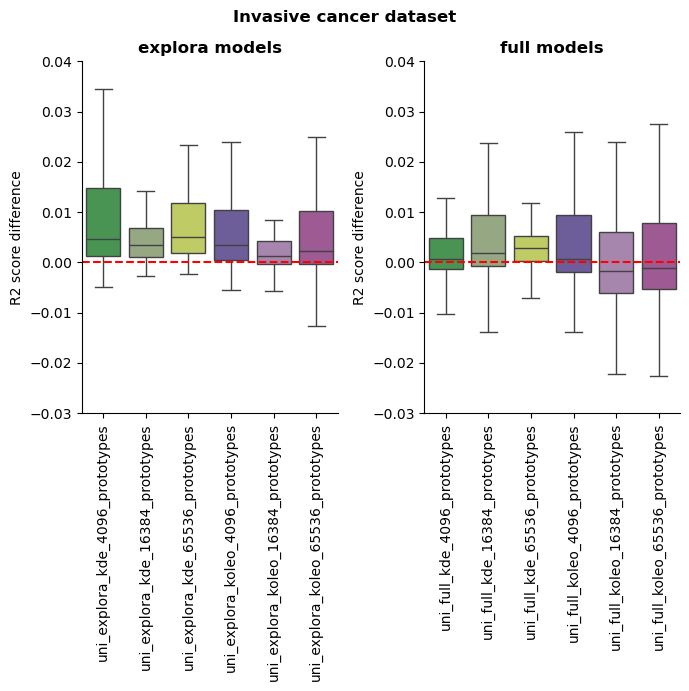

In [28]:
plt.figure(figsize=(7, 7))
i = 0
for model_type, names, benchmark_folder in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):
    
    plt.subplot(1, 2, i+1)

    dfs = []
    for model_name in names:
       dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", "invasive", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)

    sns.boxplot(data=df_diff, palette=retrained_palette[1:], showfliers=False)
    sns.despine()
    plt.xticks(rotation=90);
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"{model_type} models", weight='bold')
    plt.ylim(-0.03, 0.04)
    plt.ylabel("R2 score difference")
    i += 1

plt.suptitle("Invasive cancer dataset", weight='bold')

plt.tight_layout()
plt.savefig(os.path.join(config["figures_folder"], "Figure3/handcrafted_features_r2_diff_boxplots_invasive.pdf"), bbox_inches='tight')

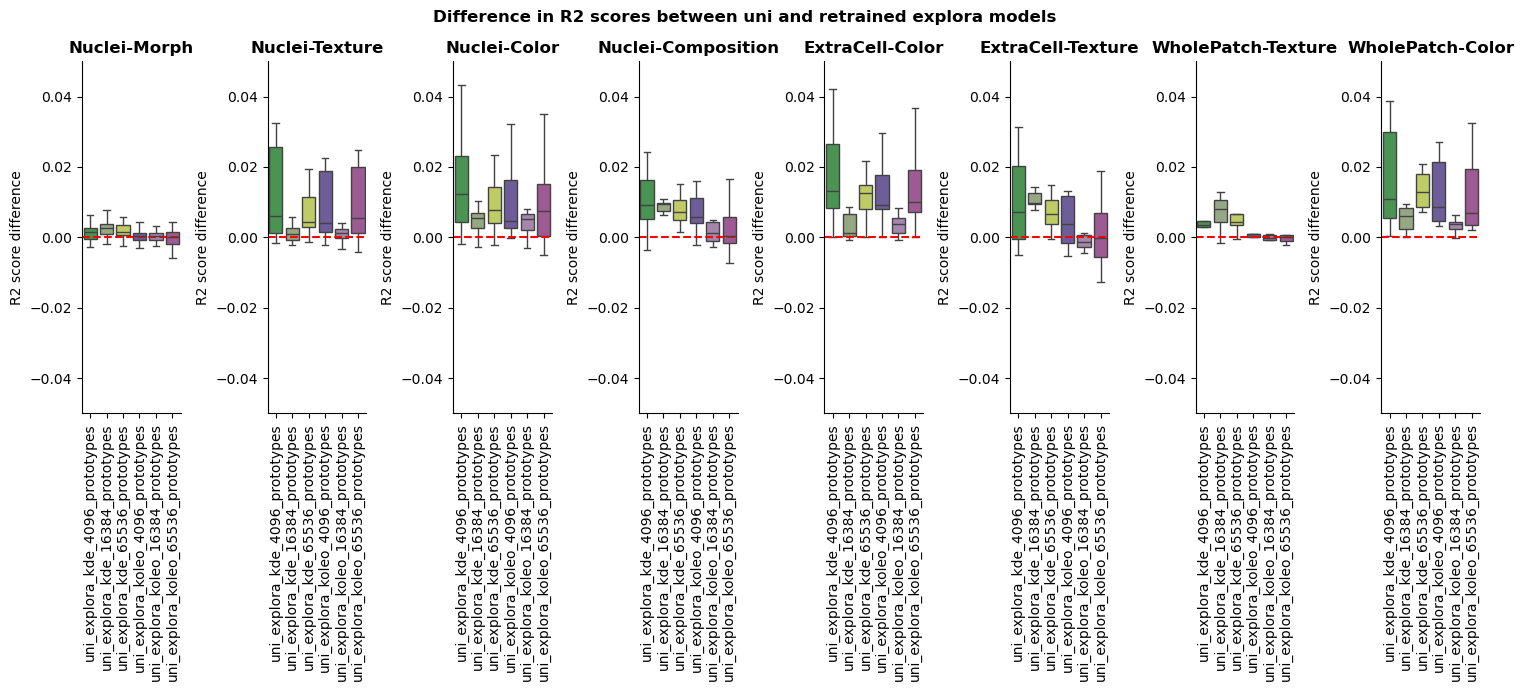

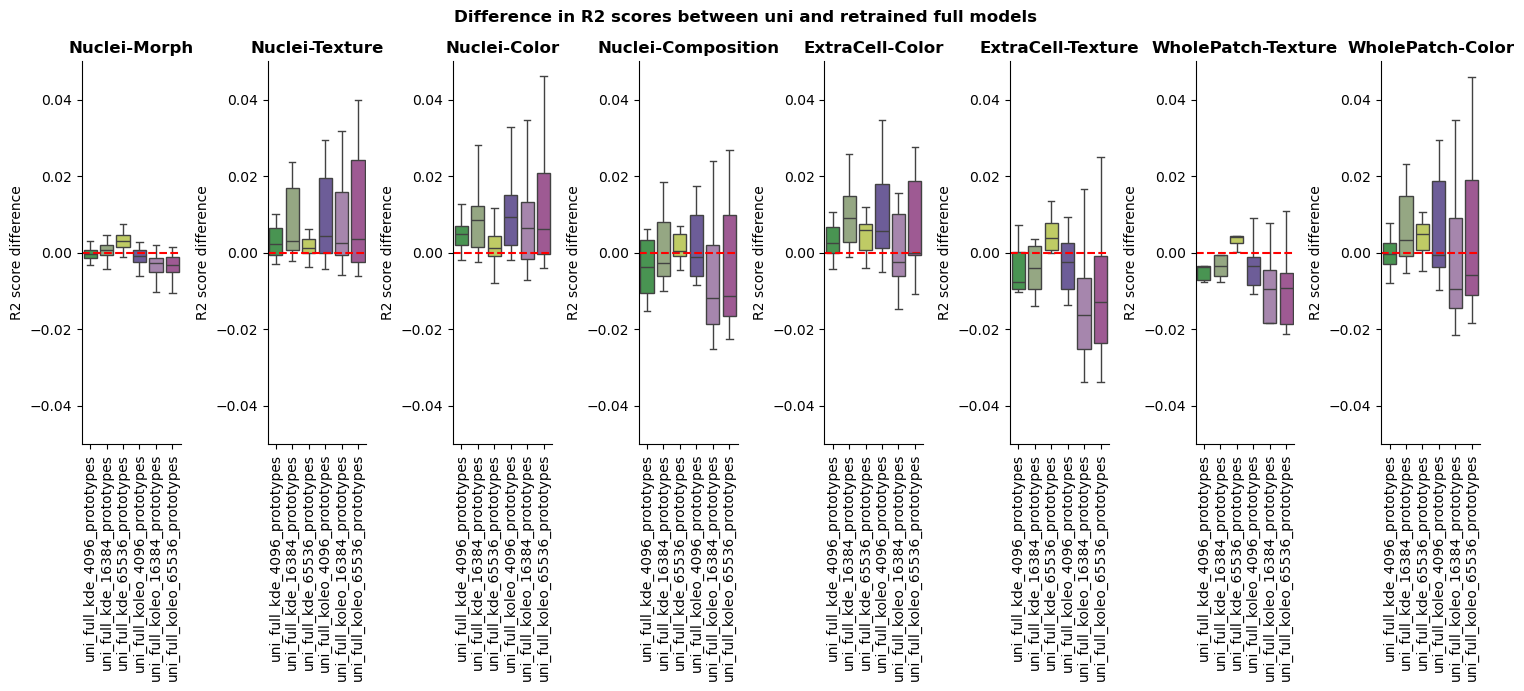

In [29]:
for model_type, names, benchmark_folder in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

    dfs = []

    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", "invasive", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)
    
    plt.figure(figsize=(15, 7))
    for j, feature_type in enumerate(feature_types_order):
        plt.subplot(1, len(feature_types), j+1)
        idxs = [idx for idx in df_diff.index if idx.startswith(feature_type)]
        sns.boxplot(data=df_diff.loc[idxs], palette=retrained_palette[1:], showfliers=False)
        plt.xticks(rotation=90)
        plt.title(f"{feature_type}", weight='bold')
        plt.ylabel("R2 score difference")
        sns.despine()
        if model_type == "full":
            plt.ylim(-0.05, 0.05)
        else:
            plt.ylim(-0.05, 0.05)
        plt.axhline(0, color='red', linestyle='--')
    plt.suptitle(f"Difference in R2 scores between uni and retrained {model_type} models", weight='bold')
    plt.tight_layout()
    
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/handcrafted_features_r2_diff_{model_type}_vs_uni_per_feature_invasive.pdf"), bbox_inches='tight')

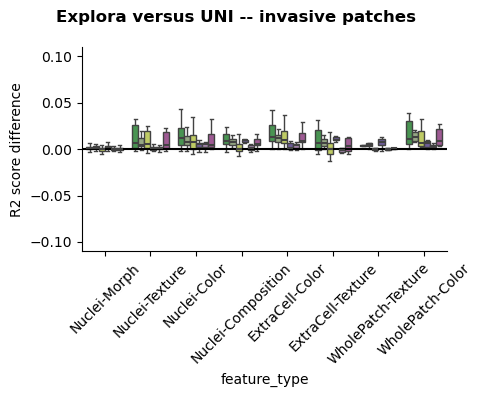

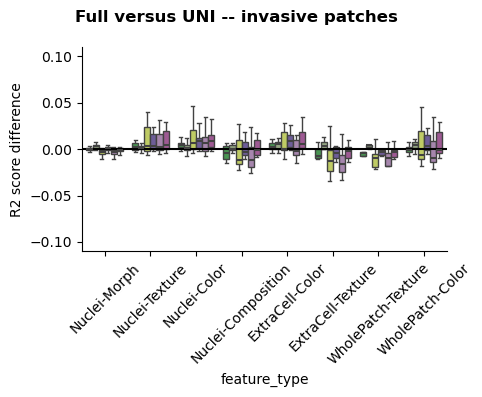

In [30]:
for model_type, names, benchmark_folder in zip(
    [config['retrained_model_list1_type'], config['retrained_model_list2_type']], 
    [config['retrained_model_list1'], config['retrained_model_list2']],
    [config['retrained_benchmark_folder1'], config['retrained_benchmark_folder2']]):

    dfs = []
    
    for model_name in names:
        dfs.append(pd.read_csv(os.path.join(benchmark_folder, "regression", "linear", "invasive", model_name, 'r2_scores.csv'), index_col=0))

    df = pd.concat(dfs, axis=1)
    df.columns = names

    df_diff = df.apply(lambda x: x - df['uni'], axis=0)
    df_diff.drop('uni', axis=1, inplace=True)

    plt.figure(figsize=(5, 4))

    df_diff_melted = df_diff.reset_index().melt(id_vars='index', var_name='Model', value_name='R2 score difference')
    df_diff_melted.rename(columns={'index': 'feature'}, inplace=True)
    df_diff_melted["feature_type"] = [idx.split("_")[0] for idx in df_diff_melted['feature']]

    df_diff_melted['feature_type'] = pd.Categorical(df_diff_melted['feature_type'], categories=ordered_list, ordered=True)
    df_diff_melted = df_diff_melted.sort_values('feature_type').reset_index(drop=True)

    sns.boxplot(df_diff_melted, x='feature_type', y='R2 score difference', hue="Model", 
                showfliers=False, palette=retrained_palette[1:], linewidth=1, medianprops=dict(linewidth=1.5))
    sns.despine()
    plt.ylim(-0.11, 0.11)
    plt.legend().remove()
    plt.xticks(rotation=45);
    plt.axhline(y=0, color="black")
    plt.suptitle(f"{model_type.capitalize()} versus UNI -- invasive patches", weight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/handcrafted_features_r2_diff_{model_type}_vs_uni_per_feature_invasive_only.pdf"), bbox_inches='tight')